In [4]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv("songs.csv")

df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,title,artist,hot_100
0,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,flowers,miley cyrus,1
1,0.347,0.378,8,-9.960,1,0.0354,0.85700,0.000000,0.1180,0.610,173.482,audio_features,5ReIs3aH4wfBjp93QOtWAl,spotify:track:5ReIs3aH4wfBjp93QOtWAl,https://api.spotify.com/v1/tracks/5ReIs3aH4wfB...,https://api.spotify.com/v1/audio-analysis/5ReI...,168609,4,kill bill,sza,1
2,0.517,0.675,6,-5.382,1,0.0357,0.45900,0.000000,0.1510,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,last night,morgan wallen,1
3,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,unholy,sam smith & kim petras,1
4,0.728,0.293,1,-13.657,0,0.0562,0.47900,0.904000,0.1180,0.152,98.302,audio_features,4CpujwKsq4DxOIMiKr12m8,spotify:track:4CpujwKsq4DxOIMiKr12m8,https://api.spotify.com/v1/tracks/4CpujwKsq4Dx...,https://api.spotify.com/v1/audio-analysis/4Cpu...,217026,4,creepin',"metro boomin, the weeknd & 21 savage",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.584,0.932,1,-3.501,1,0.3330,0.00106,0.002690,0.1290,0.204,74.976,audio_features,3mT8SuFmvheAToweq9oLGt,spotify:track:3mT8SuFmvheAToweq9oLGt,https://api.spotify.com/v1/tracks/3mT8SuFmvheA...,https://api.spotify.com/v1/audio-analysis/3mT8...,274404,4,like a bitch - kill the noise remix,kill the noise,0
2109,0.576,0.451,8,-9.571,1,0.0444,0.46900,0.038900,0.0876,0.803,90.439,audio_features,3yPD6CHGE1xdJBWyu6ZBKk,spotify:track:3yPD6CHGE1xdJBWyu6ZBKk,https://api.spotify.com/v1/tracks/3yPD6CHGE1xd...,https://api.spotify.com/v1/audio-analysis/3yPD...,172825,4,candy,dillon francis,0
2110,0.637,0.935,0,-2.467,1,0.1070,0.00857,0.003990,0.2140,0.468,150.082,audio_features,6g10yOV7NssHq2XHpi6UgY,spotify:track:6g10yOV7NssHq2XHpi6UgY,https://api.spotify.com/v1/tracks/6g10yOV7NssH...,https://api.spotify.com/v1/audio-analysis/6g10...,207200,4,habit - dack janiels & wenzday remix,rain man,0
2111,0.557,0.992,1,-2.735,1,0.1330,0.00164,0.677000,0.0913,0.598,150.011,audio_features,1zsBoEW57MoMPelCWSggHw,spotify:track:1zsBoEW57MoMPelCWSggHw,https://api.spotify.com/v1/tracks/1zsBoEW57MoM...,https://api.spotify.com/v1/audio-analysis/1zsB...,185600,4,first contact,twin moons,0


In [6]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
title                object
artist               object
hot_100               int64
dtype: object

In [7]:
df_copy = df.copy()

data = pd.DataFrame(df_copy)

In [8]:
data = data.select_dtypes([np.number])

In [9]:
data = data.drop(['key', 'mode', 'time_signature', 'hot_100'], axis=1)

In [10]:
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,0.347,0.378,-9.960,0.0354,0.8570,0.000000,0.1180,0.610,173.482,168609
2,0.517,0.675,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855
3,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943
4,0.728,0.293,-13.657,0.0562,0.4790,0.904000,0.1180,0.152,98.302,217026


In [11]:
X = data.copy()

X = pd.DataFrame(X, columns=data.columns)

X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,0.347,0.378,-9.960,0.0354,0.8570,0.000000,0.1180,0.610,173.482,168609
2,0.517,0.675,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855
3,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943
4,0.728,0.293,-13.657,0.0562,0.4790,0.904000,0.1180,0.152,98.302,217026


In [12]:
X.shape

(2113, 10)

In [13]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2.113000e+03
mean,0.619087,0.655386,-7.514912,0.092497,0.215462,0.134224,0.186303,0.493803,121.109071,2.371975e+05
std,0.160837,0.221426,4.413127,0.095552,0.277277,0.279984,0.146820,0.245341,27.817981,8.350358e+04
min,0.055500,0.001070,-44.526000,0.023100,0.000002,0.000000,0.018800,0.005170,47.859000,2.904800e+04
25%,0.518000,0.525000,-8.795000,0.036800,0.012500,0.000000,0.093700,0.294000,99.989000,1.931470e+05
50%,0.630000,0.691000,-6.431000,0.053000,0.079200,0.000038,0.127000,0.485000,120.970000,2.220930e+05
75%,0.736000,0.826000,-4.865000,0.103000,0.321000,0.038300,0.241000,0.687000,138.827000,2.604270e+05
max,0.984000,0.996000,-0.144000,0.936000,0.996000,0.971000,0.964000,0.978000,219.446000,1.156000e+06


In [14]:
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "Scalers/scaler.pickle" 

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,0.347,0.378,-9.960,0.0354,0.8570,0.000000,0.1180,0.610,173.482,168609
2,0.517,0.675,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855
3,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943
4,0.728,0.293,-13.657,0.0562,0.4790,0.904000,0.1180,0.152,98.302,217026


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.546725,0.115706,0.722995,-0.268997,-0.549264,-0.479496,-1.049859,0.620497,-0.111827,-0.440116
1,-1.692099,-1.253019,-0.554180,-0.597694,2.314258,-0.479514,-0.465330,0.473728,1.883146,-0.821579
2,-0.634876,0.088603,0.483425,-0.594553,0.878529,-0.479514,-0.240511,0.098651,2.975181,-0.878524
3,0.590258,-0.828398,0.031711,-0.063824,-0.730353,-0.479498,0.542949,-1.042889,0.359994,-0.961319
4,0.677323,-1.636985,-1.392106,-0.379958,0.950676,2.750007,-0.465330,-1.393504,-0.820062,-0.241622


In [15]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03
mean,-1.059257e-16,-2.121666e-16,1.049011e-16,9.662566e-17,1.072392e-16,-3.112880e-16,5.239801e-17,-1.499038e-16,7.313916e-17,-7.487306e-18
std,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,-3.504924e+00,-2.955705e+00,-8.388575e+00,-7.264504e-01,-7.772421e-01,-4.795143e-01,-1.141149e+00,-1.992119e+00,-2.633815e+00,-2.493292e+00
25%,-6.286572e-01,-5.889843e-01,-2.901324e-01,-5.830383e-01,-7.321571e-01,-4.795143e-01,-6.308782e-01,-8.145807e-01,-7.594035e-01,-5.276538e-01
50%,6.786579e-02,1.608785e-01,2.456690e-01,-4.134561e-01,-4.915462e-01,-4.793771e-01,-4.040155e-01,-3.588770e-02,-5.000520e-03,-1.809279e-01
75%,7.270751e-01,7.707066e-01,6.006034e-01,1.099456e-01,3.807134e-01,-3.426883e-01,3.726314e-01,7.876515e-01,6.370744e-01,2.782509e-01
max,2.269376e+00,1.538638e+00,1.670620e+00,8.829818e+00,2.815681e+00,2.989364e+00,5.298208e+00,1.974037e+00,3.535850e+00,1.100576e+01


In [16]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [17]:
clusters = kmeans.predict(X_scaled_df)

pd.Series(clusters).value_counts().sort_index() 

0    292
1    232
2    491
3    124
4    170
5    172
6    197
7    435
dtype: int64

In [18]:
# Am not sure how to integrate the "user_cluster" part 

#Code from lecture-
#user_scaled = scaler.transform(X_user)
#user_cluster = kmeans.predict(X_user_scaled)
#X[(X['dataset'] == "N") & (X['cluster'] == user_cluster)].sample()

In [19]:
X["cluster"] = clusters
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,2
1,0.347,0.378,-9.960,0.0354,0.8570,0.000000,0.1180,0.610,173.482,168609,1
2,0.517,0.675,-5.382,0.0357,0.4590,0.000000,0.1510,0.518,203.853,163855,0
3,0.714,0.472,-7.375,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943,7
4,0.728,0.293,-13.657,0.0562,0.4790,0.904000,0.1180,0.152,98.302,217026,3


In [20]:
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns[:-1])

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.507805,0.772781,-5.539846,0.083699,0.093324,0.050475,0.168917,0.485622,158.635856,217638.565068
1,0.574513,0.390220,-9.955815,0.050463,0.612742,0.041500,0.140128,0.398178,116.854371,217204.543103
2,0.727189,0.732699,-6.350275,0.066537,0.151539,0.024561,0.143819,0.765363,111.367224,226898.957230
3,0.402189,0.159370,-19.560347,0.041188,0.844766,0.709783,0.151773,0.183045,105.619153,303825.435484
4,0.572918,0.826847,-5.041959,0.106572,0.077048,0.113223,0.542482,0.469901,122.771065,248367.382353
5,0.656878,0.717866,-8.377663,0.057905,0.097174,0.743726,0.157185,0.476072,122.884273,310845.122093
6,0.697919,0.620487,-7.596518,0.331223,0.207970,0.017511,0.178059,0.518294,123.206832,214557.898477
7,0.624770,0.696223,-6.008166,0.064813,0.082588,0.019675,0.156449,0.337619,111.297885,230388.606897


In [21]:
kmeans.inertia_

10581.405381378452

In [22]:
kmeans2 = KMeans(n_clusters=8, 
                init="random",
                n_init=3, 
                max_iter=2, 
                tol=0, 
                algorithm="full",
                random_state=1234)

kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

11722.824627756803


Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 25863.744151520325.
Iteration 1, inertia 18270.498421226683.
Iteration 2, inertia 17808.02945719774.
Iteration 3, inertia 17436.501806783475.
Iteration 4, inertia 17243.367253733948.
Iteration 5, inertia 17168.312696730743.
Iteration 6, inertia 17131.85460494997.
Iteration 7, inertia 17120.790529143014.
Iteration 8, inertia 17117.580515759768.
Iteration 9, inertia 17113.406274496097.
Iteration 10, inertia 17111.390195623375.
Iteration 11, inertia 17110.914132234877.
Iteration 12, inertia 17110.556647460737.
Iteration 13, inertia 17110.467963975832.
Iteration 14, inertia 17110.08896948177.
Iteration 15, inertia 17109.701408444922.
Iteration 16, inertia 17109.6098858797.
Iteration 17, inertia 17109.570623005555.
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 33778.44020041791.
Iteration 1, inertia 19638.529515861723.
Iteration 2, inertia 19367.17581821531.

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 24, inertia 15355.516613702268.
Iteration 25, inertia 15354.833845284516.
Iteration 26, inertia 15354.231851819673.
Iteration 27, inertia 15354.162135096856.
Iteration 28, inertia 15354.124661623791.
Converged at iteration 28: strict convergence.
Initialization complete
Iteration 0, inertia 19299.1761499662.
Iteration 1, inertia 16018.45270321626.
Iteration 2, inertia 15857.424102380086.
Iteration 3, inertia 15814.449518559199.
Iteration 4, inertia 15775.201652256415.
Iteration 5, inertia 15741.103241746729.
Iteration 6, inertia 15707.993513309664.
Iteration 7, inertia 15685.744710383779.
Iteration 8, inertia 15665.703008297889.
Iteration 9, inertia 15645.013782941222.
Iteration 10, inertia 15626.414324067006.
Iteration 11, inertia 15611.697580455235.
Iteration 12, inertia 15592.282116426626.
Iteration 13, inertia 15560.406981858385.
Iteration 14, inertia 15513.236607643994.
Iteration 15, inertia 15465.516386324683.
Iteration 16, inertia 15433.489856113087.
Iteration 17, iner

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 5 clusters! 

Initialization complete
Iteration 0, inertia 19289.728423240922.
Iteration 1, inertia 15412.056137597356.
Iteration 2, inertia 14526.29846618673.
Iteration 3, inertia 14110.12419125573.
Iteration 4, inertia 13408.5419590274.
Iteration 5, inertia 13051.784690698893.
Iteration 6, inertia 12949.216318236255.
Iteration 7, inertia 12924.35275168415.
Iteration 8, inertia 12917.382843525087.
Iteration 9, inertia 12916.72316701441.
Iteration 10, inertia 12916.507626589491.
Converged at iteration 10: center shift 5.820870760351839e-05 within tolerance 0.0001.
Initialization complete
Iteration 0, inertia 17739.968084607364.
Iteration 1, inertia 14354.920898542257.
Iteration 2, inertia 13928.952018241978.
Iteration 3, inertia 13663.219329841471.
Iteration 4, inertia 13438.019088503645.
Iteration 5, inertia 13288.01368720202.
Iteration 6, inertia 13145.555990757366.
Iteration 7, inertia 13048.923467369208.
Iteration 8, inertia 12982.979315561193.
Iterati

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 8, inertia 11990.585676594572.
Iteration 9, inertia 11990.454847679557.
Converged at iteration 9: center shift 6.844245196323059e-05 within tolerance 0.0001.
Initialization complete
Iteration 0, inertia 18050.639662158042.
Iteration 1, inertia 13151.197199701943.
Iteration 2, inertia 12599.757812062051.
Iteration 3, inertia 12455.896662045088.
Iteration 4, inertia 12395.2415248307.
Iteration 5, inertia 12350.565127321655.
Iteration 6, inertia 12320.645389970578.
Iteration 7, inertia 12295.316278076625.
Iteration 8, inertia 12269.649056964932.
Iteration 9, inertia 12251.266485140204.
Iteration 10, inertia 12232.596141742215.
Iteration 11, inertia 12205.403593503184.
Iteration 12, inertia 12176.297307522527.
Iteration 13, inertia 12142.601284768498.
Iteration 14, inertia 12102.863510379306.
Iteration 15, inertia 12040.30634097392.
Iteration 16, inertia 11997.737555122527.
Iteration 17, inertia 11975.128634202363.
Iteration 18, inertia 11967.86171848248.
Iteration 19, inertia 11

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 17, inertia 10793.608775616096.
Iteration 18, inertia 10783.471737740278.
Iteration 19, inertia 10772.685704100033.
Iteration 20, inertia 10761.13906474564.
Iteration 21, inertia 10749.452705732052.
Iteration 22, inertia 10740.836984725349.
Iteration 23, inertia 10735.62241326768.
Iteration 24, inertia 10731.69846257656.
Iteration 25, inertia 10725.710616927163.
Iteration 26, inertia 10716.750656325012.
Iteration 27, inertia 10703.556015398904.
Iteration 28, inertia 10686.398472265446.
Iteration 29, inertia 10673.662791551029.
Iteration 30, inertia 10665.78426784432.
Iteration 31, inertia 10656.996435349256.
Iteration 32, inertia 10645.29628099227.
Iteration 33, inertia 10636.512217808118.
Iteration 34, inertia 10630.144058901544.
Iteration 35, inertia 10620.766859551695.
Iteration 36, inertia 10612.801657793774.
Iteration 37, inertia 10609.27591886611.
Iteration 38, inertia 10606.42718389777.
Iteration 39, inertia 10604.586534472452.
Iteration 40, inertia 10602.469928860986.

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 11 clusters! 

Initialization complete
Iteration 0, inertia 13593.817019888833.
Iteration 1, inertia 10507.086597630725.
Iteration 2, inertia 10109.602182088993.
Iteration 3, inertia 9987.75069671135.
Iteration 4, inertia 9926.05484980169.
Iteration 5, inertia 9890.72076121264.
Iteration 6, inertia 9870.621349531339.
Iteration 7, inertia 9858.865210060174.
Iteration 8, inertia 9844.892373816703.
Iteration 9, inertia 9830.81691677542.
Iteration 10, inertia 9821.719998795626.
Iteration 11, inertia 9812.954662449742.
Iteration 12, inertia 9799.615207144336.
Iteration 13, inertia 9784.9949935287.
Iteration 14, inertia 9768.344479010751.
Iteration 15, inertia 9762.05242650383.
Iteration 16, inertia 9759.201667907477.
Iteration 17, inertia 9755.084461663737.
Iteration 18, inertia 9754.478067233933.
Iteration 19, inertia 9753.56531674535.
Iteration 20, inertia 9753.16595263016.
Iteration 21, inertia 9752.581361934368.
Iteration 22, inertia 9751.827487746452.
Iter

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 25, inertia 9542.418905004752.
Iteration 26, inertia 9541.63410888933.
Iteration 27, inertia 9540.9682333245.
Iteration 28, inertia 9538.85680852488.
Iteration 29, inertia 9535.481508329787.
Iteration 30, inertia 9532.8553332007.
Iteration 31, inertia 9531.40225524606.
Iteration 32, inertia 9529.482391770587.
Iteration 33, inertia 9527.51454373808.
Iteration 34, inertia 9522.026570458063.
Iteration 35, inertia 9517.434786463342.
Iteration 36, inertia 9512.56190117549.
Iteration 37, inertia 9508.878372432888.
Iteration 38, inertia 9505.702173748923.
Iteration 39, inertia 9502.730699632619.
Iteration 40, inertia 9499.370342528735.
Iteration 41, inertia 9494.726847110436.
Iteration 42, inertia 9491.58711478938.
Iteration 43, inertia 9490.177428462574.
Iteration 44, inertia 9486.607069946174.
Iteration 45, inertia 9483.8712073088.
Iteration 46, inertia 9483.042182084513.
Iteration 47, inertia 9482.686179840815.
Iteration 48, inertia 9482.106419079048.
Iteration 49, inertia 9481.6

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 12693.540887660905.
Iteration 1, inertia 9807.798657368072.
Iteration 2, inertia 9488.356745455278.
Iteration 3, inertia 9380.738633927684.
Iteration 4, inertia 9323.818529853681.
Iteration 5, inertia 9278.717121349404.
Iteration 6, inertia 9258.659444299807.
Iteration 7, inertia 9241.669857903864.
Iteration 8, inertia 9232.04131262953.
Iteration 9, inertia 9225.50993836212.
Iteration 10, inertia 9214.192764588495.
Iteration 11, inertia 9197.727714390941.
Iteration 12, inertia 9184.41725342222.
Iteration 13, inertia 9177.527912475045.
Iteration 14, inertia 9172.488863851018.
Iteration 15, inertia 9169.11396824865.
Iteration 16, inertia 9163.106709901404.
Iteration 17, inertia 9156.343570808029.
Iteration 18, inertia 9149.383485599279.
Iteration 19, inertia 9142.578699348871.
Iteration 20, inertia 9139.739754649225.
Iteration 21, inertia 9138.546141674859.
Iteration 22, inertia 9136.612536961326.
Iteration 23, inertia 9135.165377006811.
Iteration 24, inertia 9133.52

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 12058.67751579953.
Iteration 1, inertia 9383.154782871925.
Iteration 2, inertia 9163.405115348589.
Iteration 3, inertia 9067.124542636448.
Iteration 4, inertia 8975.52355194186.
Iteration 5, inertia 8939.27698782398.
Iteration 6, inertia 8916.601235373168.
Iteration 7, inertia 8902.619250855474.
Iteration 8, inertia 8890.49138939796.
Iteration 9, inertia 8882.272543768157.
Iteration 10, inertia 8875.661613641692.
Iteration 11, inertia 8871.77866441345.
Iteration 12, inertia 8868.528113768498.
Iteration 13, inertia 8867.263096297564.
Iteration 14, inertia 8865.05732484597.
Iteration 15, inertia 8863.967627199685.
Iteration 16, inertia 8863.158599076243.
Iteration 17, inertia 8862.424580151703.
Iteration 18, inertia 8861.819341040191.
Iteration 19, inertia 8861.562745802974.
Iteration 20, inertia 8861.046678715415.
Iteration 21, inertia 8860.399265181824.
Iteration 22, inertia 8859.764541562541.
Iteration 23, inertia 8859.313751935704.
Iterati

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1, inertia 9192.074443838736.
Iteration 2, inertia 8986.617303725508.
Iteration 3, inertia 8891.772850899051.
Iteration 4, inertia 8830.680314356816.
Iteration 5, inertia 8803.549025805733.
Iteration 6, inertia 8786.086416042346.
Iteration 7, inertia 8773.45154205056.
Iteration 8, inertia 8764.07407900643.
Iteration 9, inertia 8751.516128180643.
Iteration 10, inertia 8741.509131192635.
Iteration 11, inertia 8734.256246412584.
Iteration 12, inertia 8728.527494051195.
Iteration 13, inertia 8724.95441216811.
Iteration 14, inertia 8722.394428562602.
Iteration 15, inertia 8719.816214855742.
Iteration 16, inertia 8715.557658101374.
Iteration 17, inertia 8710.453171516967.
Iteration 18, inertia 8706.612388118927.
Iteration 19, inertia 8704.313308255916.
Iteration 20, inertia 8702.572197363701.
Iteration 21, inertia 8701.668252861147.
Iteration 22, inertia 8700.64427993788.
Iteration 23, inertia 8700.06559884296.
Iteration 24, inertia 8699.338444552464.
Iteration 25, inertia 8698.451

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 11102.50363003645.
Iteration 1, inertia 8792.022221398778.
Iteration 2, inertia 8571.31968435774.
Iteration 3, inertia 8490.746001192505.
Iteration 4, inertia 8436.616275934739.
Iteration 5, inertia 8374.389684932927.
Iteration 6, inertia 8307.81887176941.
Iteration 7, inertia 8278.201061013868.
Iteration 8, inertia 8266.406612771698.
Iteration 9, inertia 8258.279633839044.
Iteration 10, inertia 8250.048739074939.
Iteration 11, inertia 8243.34141184372.
Iteration 12, inertia 8239.327984026273.
Iteration 13, inertia 8235.983290426542.
Iteration 14, inertia 8229.808184510614.
Iteration 15, inertia 8225.729667891736.
Iteration 16, inertia 8222.102291467485.
Iteration 17, inertia 8219.517201635677.
Iteration 18, inertia 8216.137582421006.
Iteration 19, inertia 8212.469840260797.
Iteration 20, inertia 8207.928381385973.
Iteration 21, inertia 8205.778885506556.
Iteration 22, inertia 8196.88409573682.
Iteration 23, inertia 8187.177359887035.
Iterat

/Users/aloaskari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

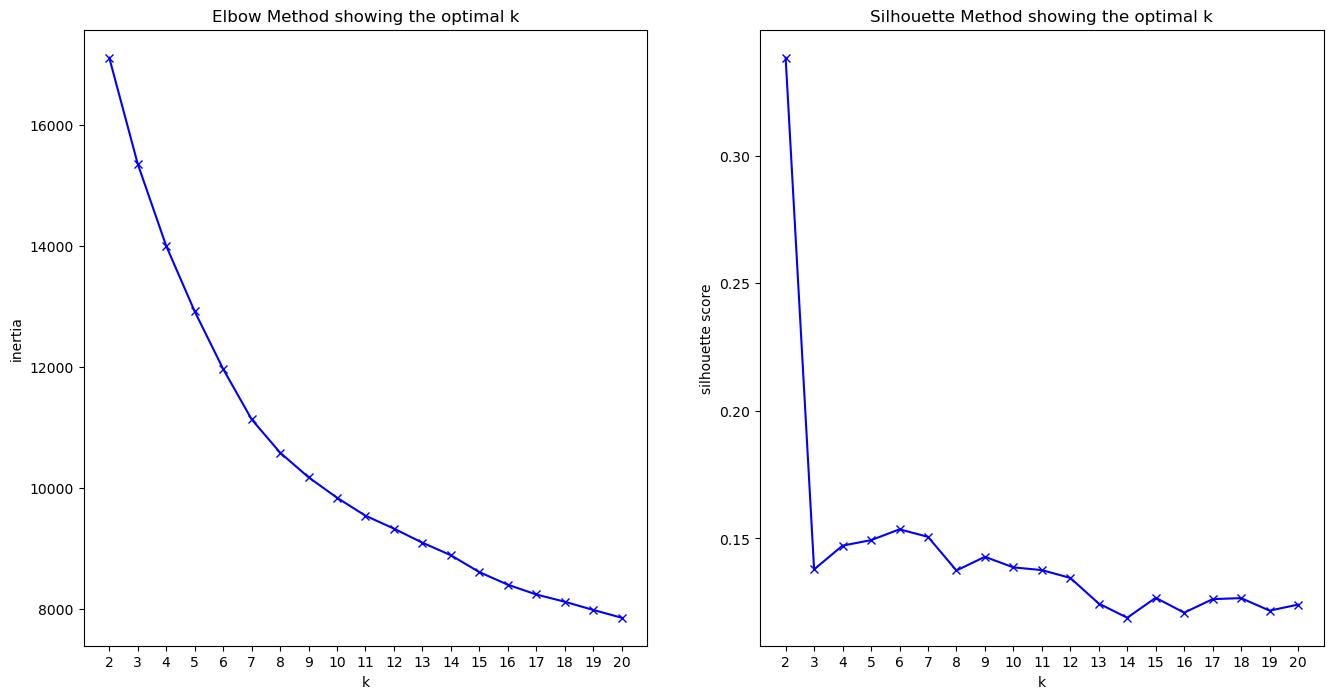

In [24]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "Models/Kmeans" + str(k) + ".pickle" 
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')